## Dataset Details

Numerical Columns -
* Temperature - Climate Temperature in deg C
* Rainfall - Rainfall received in mm
* pH - Soil pH 
* Light_Hours - Number of Light Hours
* Light_Intensity - Intensity measuers in μmol·m−2·s−1
* Rh - Relative Humidity measured in %
* Yield - Measured in 100g/ha

Categorical Columns -
* Name - Name of the crop
* Soil_Type - Type of the soil
* Fertility - Fertility of the soil
* Photoperiod 
* N-P-K Ratio - Nitrogen-Phosphorous-Potassium ratio in the soil
* Season - Season the crop was grown in

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Initial data loading and information

In [2]:
# Reading the csv file
df = pd.read_csv("synthetic_veg_normal_crop_data.csv")
df.head()

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Season
0,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,22.489987,495.524098,6.272267,7.398897,529.733246,53.334987,60.647800,Fall
1,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.008877,454.428932,6.377733,6.625545,667.273615,57.410295,60.624575,Spring
2,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.441689,493.920716,6.094119,7.370845,579.474014,51.558559,61.403798,Spring
3,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.333592,512.838482,6.402487,6.852131,440.244272,54.587046,61.134157,Fall
4,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,23.622718,480.824112,5.803418,6.905422,588.326883,53.892511,61.263540,Summer


In [3]:
# Number of rows and columns in the DataFrame
df.shape

(1000, 14)

In [4]:
# The Columns in the DataFrame
df.columns

Index(['S. no.', 'Name', 'Soil_Type', 'Fertility', 'Photoperiod',
       'N-P-K Ratio', 'Temperature', 'Rainfall', 'pH', 'Light_Hours',
       'Light_Intensity', 'Rh', 'Yield', 'Season'],
      dtype='object')

In [20]:
# The 'Season' column has some data cleaning to do - removed white spaces in the values
df['Season'] = df['Season'].str.strip().str.replace('\s+', ' ')

C:\Users\ASHWIT~1\AppData\Local\Temp/ipykernel_28608/484924290.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Season'] = df['Season'].str.strip().str.replace('\s+', ' ')


In [5]:
# The name, the # of non-null values, and the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. no.           1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   Soil_Type        1000 non-null   object 
 3   Fertility        1000 non-null   object 
 4   Photoperiod      1000 non-null   object 
 5   N-P-K Ratio      1000 non-null   object 
 6   Temperature      1000 non-null   float64
 7   Rainfall         1000 non-null   float64
 8   pH               1000 non-null   float64
 9   Light_Hours      1000 non-null   float64
 10  Light_Intensity  1000 non-null   float64
 11  Rh               1000 non-null   float64
 12  Yield            1000 non-null   float64
 13  Season           1000 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 109.5+ KB


In [6]:
# What are the categorical columns of the DataFrame
print(df.select_dtypes(include=["object"]).columns)

Index(['Name', 'Soil_Type', 'Fertility', 'Photoperiod', 'N-P-K Ratio',
       'Season'],
      dtype='object')


In [7]:
# What are the numerical columns of the DataFrame
print(df.select_dtypes(include=["int64", "float64"]).columns)

Index(['S. no.', 'Temperature', 'Rainfall', 'pH', 'Light_Hours',
       'Light_Intensity', 'Rh', 'Yield'],
      dtype='object')


In [ ]:
# Checking if any of the columns have any null values
df.isnull().sum()

S. no.             0
Name               0
Soil_Type          0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Yield              0
Season             0
dtype: int64

## Correlation Matrix for Features

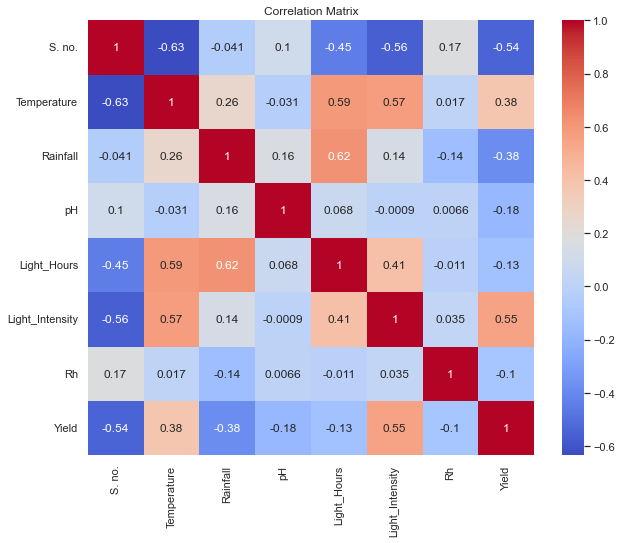

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the aesthetic style of the plots
sns.set(style='white')

# Create the heatmap
plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, annot_kws={"size": 12})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Correlations present (BUT WEAK) with-
* Light_Hours, Light_Intensity with Temperature
* Light_Hours with Rainfall

## Univariate Analysis

#### General Statistics of the dataset
* Mean
* Count
* Standard Deviation
* Min
* Max
* Lower Percentile (25%)
* Median (50% Percentile)
* Upper Percentile (75%)

In [8]:
# Describing the general statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S. no.,1000.0,5.500000,2.873719,1.000000,3.000000,5.500000,8.000000,10.000000
Temperature,1000.0,21.223453,3.388224,9.382705,19.107643,21.100561,23.949001,31.246506
Rainfall,1000.0,899.822311,248.827272,408.922109,717.766522,895.413750,1047.528260,1634.156080
pH,1000.0,6.314535,0.387982,4.869373,6.093833,6.339494,6.556465,7.397805
Light_Hours,1000.0,7.788497,1.081211,5.916419,6.929032,7.277581,8.862176,11.594160
Light_Intensity,1000.0,454.160624,107.980401,208.199107,377.061951,434.972823,534.277933,802.796178
Rh,1000.0,62.491512,9.444966,41.949928,54.588245,60.628367,70.848804,94.308429
Yield,1000.0,25.407443,14.874399,4.648454,18.978198,24.174195,29.416648,65.126196


#### Value Counts and Unique Values for Each Column

In [32]:
# What types of values does each column have? And how many?
for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print(df[column].nunique())
    print()
    print("="*45)

Value counts for Name:
Tomatoes          100
Eggplants         100
Asparagus         100
Chilli Peppers    100
Cabbage           100
Cucumbers         100
Potatoes          100
Cauliflowers      100
Broccoli          100
Green Peas        100
Name: Name, dtype: int64
10

Value counts for Soil_Type:
Fertile, well-drained loam or sandy loam soil                          100
Well-drained, sandy loam or loam soil with high organic content        100
 Deep sandy loam                                                       100
medium, organic                                                        100
Well-drained, fertile loam with high organic content                   100
Well-drained, sandy loam soil                                          100
Loamy, well-drained soil                                               100
Fertile, well-drained, moist soil with high organic matter content.    100
Rich, well-drained, loamy soil                                         100
Light, sandy, fertile, an

#### Plotting Numerical Variables

<Axes: xlabel='Temperature', ylabel='Count'>

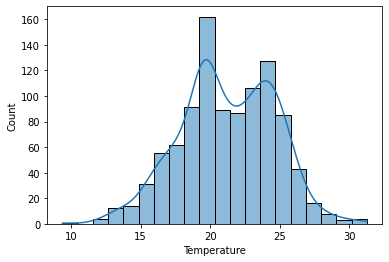

In [11]:
sns.histplot(df['Temperature'], kde=True, bins=20)

<Axes: xlabel='Rainfall', ylabel='Count'>

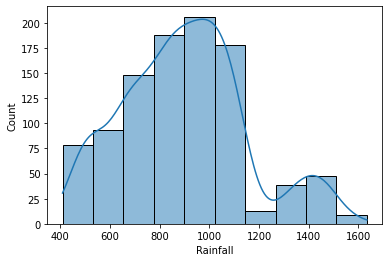

In [12]:
sns.histplot(df['Rainfall'], kde=True, bins=10)

<Axes: xlabel='pH', ylabel='Count'>

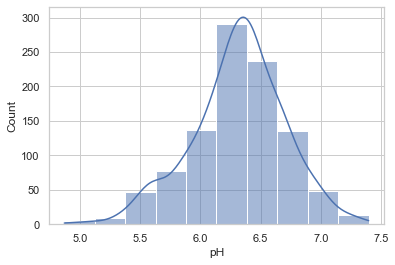

In [23]:
sns.histplot(df['pH'], kde=True, bins=10)

<Axes: xlabel='Light_Hours', ylabel='Count'>

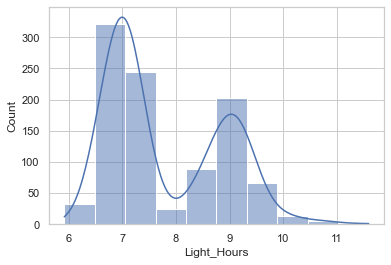

In [24]:
sns.histplot(df['Light_Hours'], kde=True, bins=10)

<Axes: xlabel='Light_Intensity', ylabel='Count'>

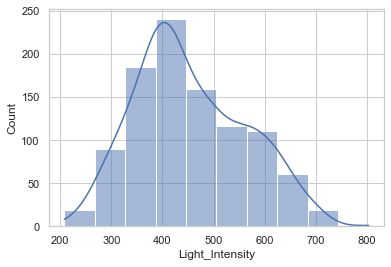

In [25]:
sns.histplot(df['Light_Intensity'], kde=True, bins=10)

<Axes: xlabel='Yield', ylabel='Count'>

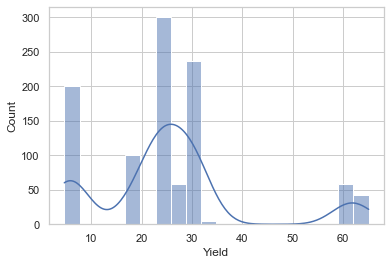

In [ ]:
sns.histplot(df['Yield'], kde=True, bins=20)

<Axes: xlabel='Rh', ylabel='Count'>

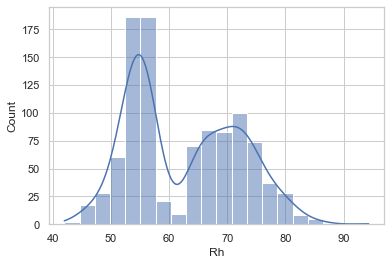

In [26]:
sns.histplot(df['Rh'], kde=True, bins=20)

#### Checking for outliers for the Numerical Columns

In [40]:
numerical_cols = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Yield']

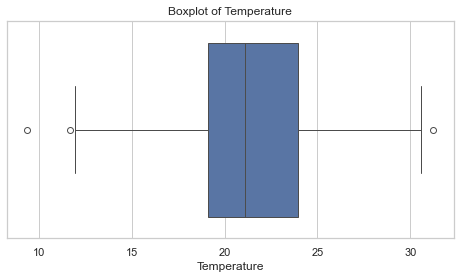

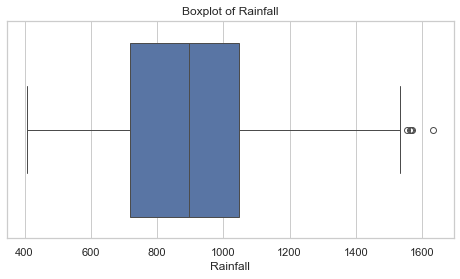

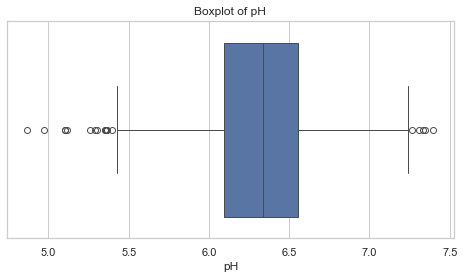

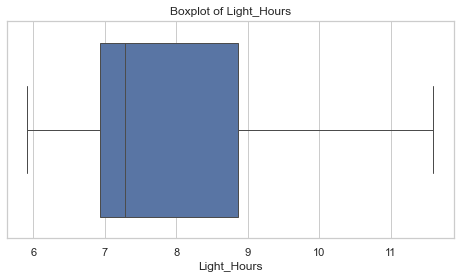

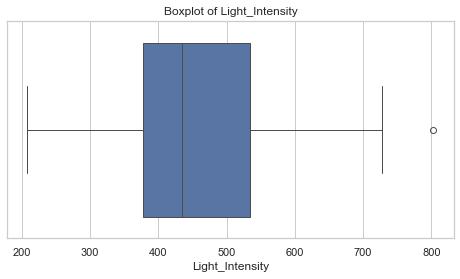

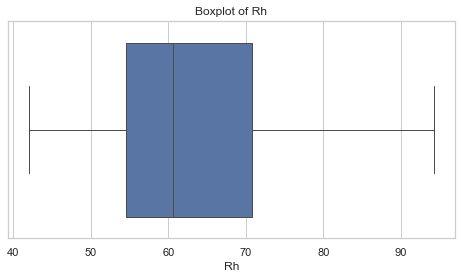

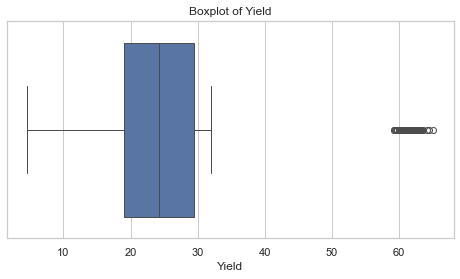

In [41]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

* Temperature, Light_Hours, pH, and Yield (due to Tomoto) have outliers

## Bivariate Analysis

### Analyzing the each numerical column with respect to Yield

The goal is to understand the ideal conditions for crop yield with respect to each of the influencing factors

#### Temperature vs. Crop Yield for each type of crop
* How does temperature affect the crop yield?

<Figure size 720x432 with 0 Axes>

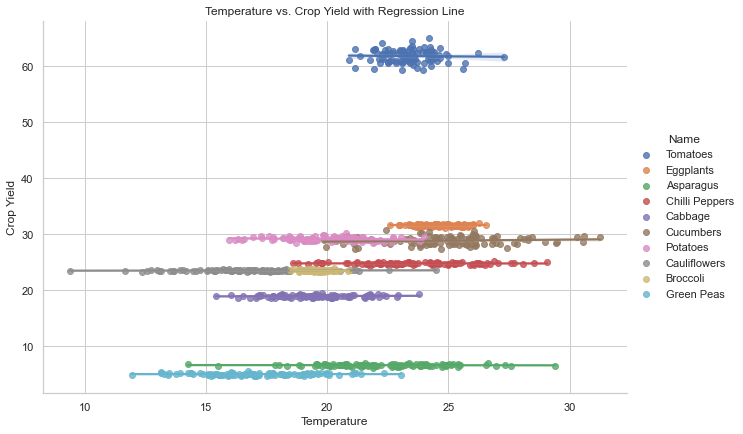

In [31]:
# Regression plot
plt.figure(figsize=(10, 6))
#sns.regplot(x='Temperature', y='Yield', hue='Name', data=df)
sns.lmplot(x='Temperature', y='Yield', hue='Name', data=df, aspect=1.5, height=6)
plt.title('Temperature vs. Crop Yield with Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')
plt.show()

Here, we can observe the optimal temperature for each type of crop for their yield.
* Average crop yield of 18-32 with temperatures 18-27.
* Tomatoes have a high yield of 60 with temperatures 20-26.

#### Rainfall vs. Crop Yield for each type of crop
* How does Rainfall affect the crop yield?

<Figure size 720x432 with 0 Axes>

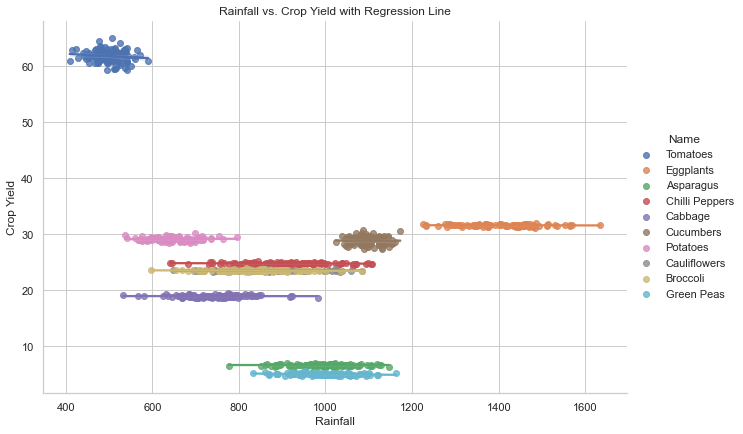

In [35]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='Rainfall', y='Yield', hue='Name', data=df, aspect=1.5, height=6)
plt.title('Rainfall vs. Crop Yield with Regression Line')
plt.xlabel('Rainfall')
plt.ylabel('Crop Yield')
plt.show()

* Tomatoes require low amount of rainfall to produce the highest yield, making it a likely crop to grow during non-rainfall seasons
* Eggplants require the most rainfall compared to other types of crops

#### pH vs. Crop Yield for each type of crop
* How does pH affect the crop yield?

<Figure size 720x432 with 0 Axes>

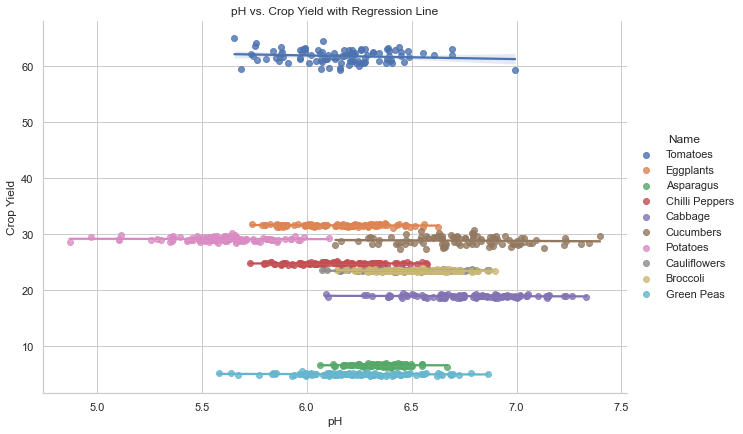

In [36]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='pH', y='Yield', hue='Name', data=df, aspect=1.5, height=6)
plt.title('pH vs. Crop Yield with Regression Line')
plt.xlabel('pH')
plt.ylabel('Crop Yield')
plt.show()

* The optimal pH to grow most crops to their highest yield is 5.5 - 7.0 pH

#### Light_Hours vs. Crop Yield for each type of crop
* How does Light_Hours affect the crop yield?

<Figure size 720x432 with 0 Axes>

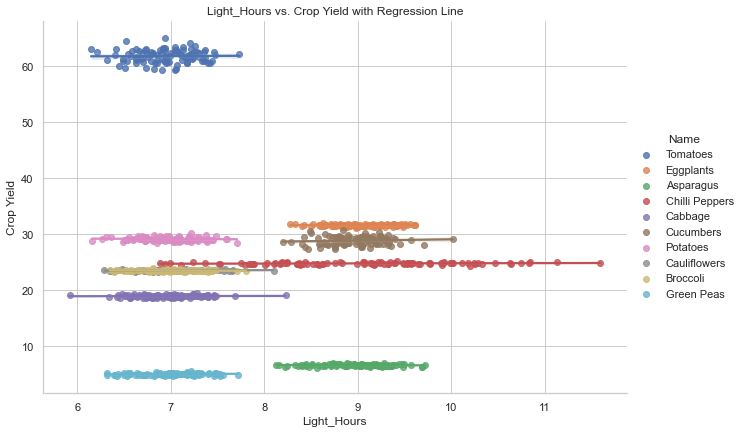

In [37]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='Light_Hours', y='Yield', hue='Name', data=df, aspect=1.5, height=6)
plt.title('Light_Hours vs. Crop Yield with Regression Line')
plt.xlabel('Light_Hours')
plt.ylabel('Crop Yield')
plt.show()

* Tomatoes right the least amount of light hours
* Chilli Peppers Require the most amount of light hours to produce the average yield

#### Light_Intensity vs. Crop Yield for each type of crop
* How does Light_Intensity affect the crop yield?

<Figure size 720x432 with 0 Axes>

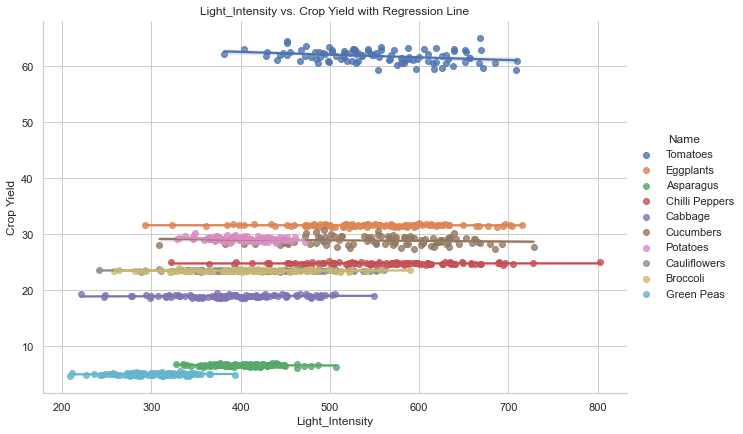

In [38]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='Light_Intensity', y='Yield', hue='Name', data=df, aspect=1.5, height=6)
plt.title('Light_Intensity vs. Crop Yield with Regression Line')
plt.xlabel('Light_Intensity')
plt.ylabel('Crop Yield')
plt.show()

* Tomatoes require 360 - 700 light intensity to produce their crop yield.

#### Rh vs. Crop Yield for each type of crop
* How does Rh affect the crop yield?

<Figure size 720x432 with 0 Axes>

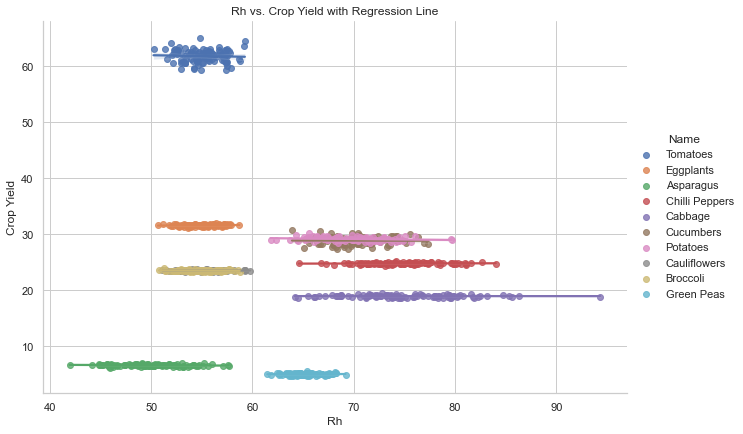

In [39]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.lmplot(x='Rh', y='Yield', hue='Name', data=df, aspect=1.5, height=6)
plt.title('Rh vs. Crop Yield with Regression Line')
plt.xlabel('Rh')
plt.ylabel('Crop Yield')
plt.show()

* Tomatoes require an Rh of 50-60 for their crop yield

### Analyzing the each numerical column with respect to Yield

The goal is to understand the ideal conditions for crop yield with respect to each of the influencing factors

#### Soil_Type vs. Crop Yield for each type of crop
* How does Soil_Type affect the crop yield?

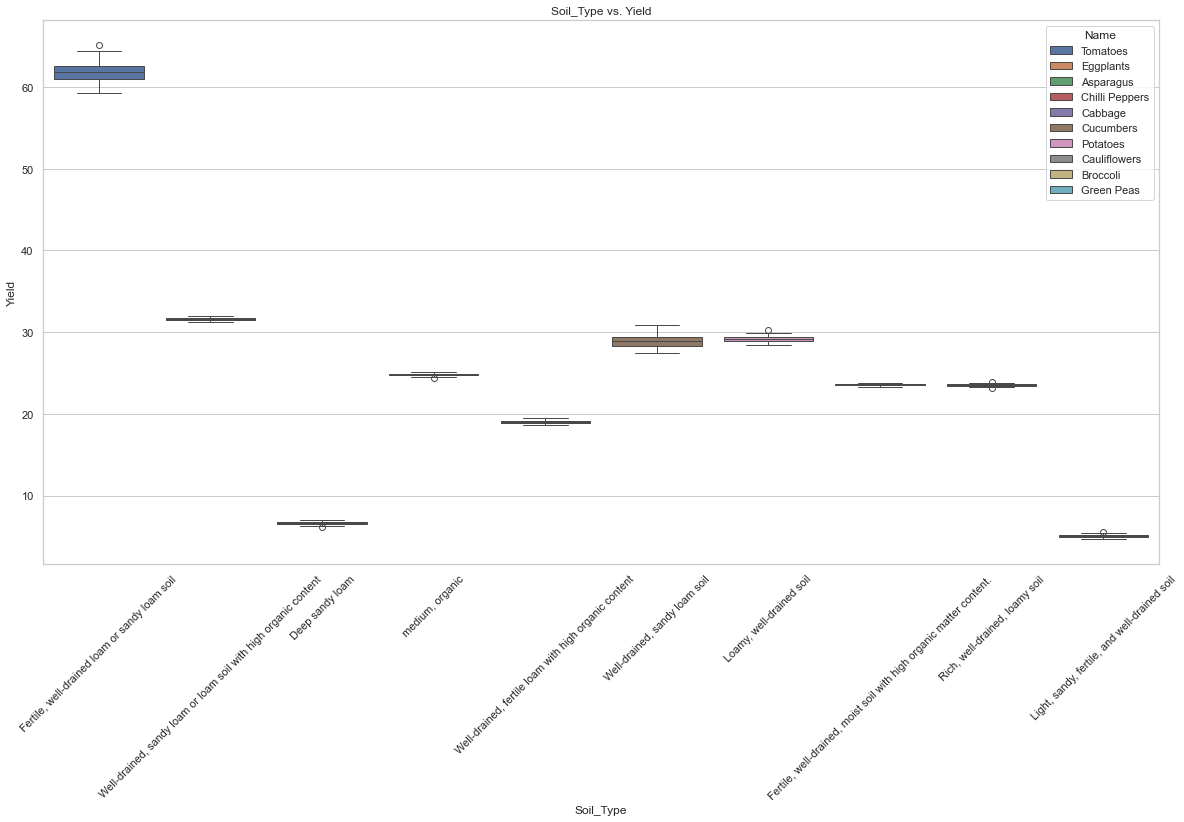

In [47]:
# Create a box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Soil_Type', y='Yield', hue='Name', data=df)

# Add a title and labels
plt.title('Soil_Type vs. Yield')
plt.xticks(rotation=45)
plt.xlabel('Soil_Type')
plt.ylabel('Yield')

# Show the plot
plt.show()

#### Fertility vs. Crop Yield for each type of crop
* How does Fertility affect the crop yield?

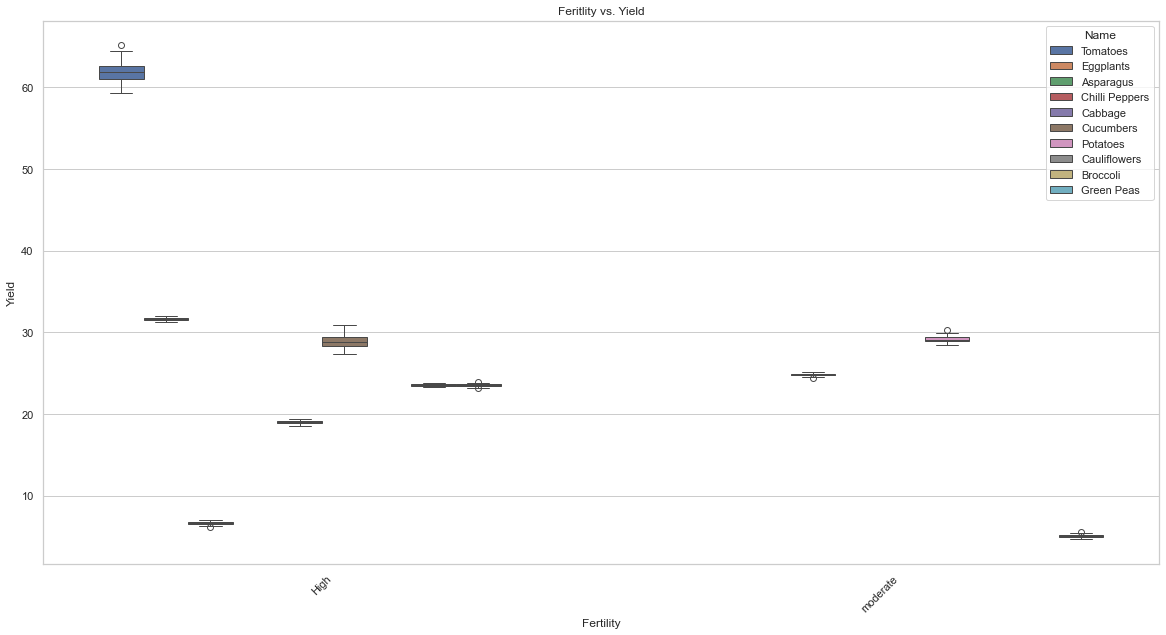

In [49]:
# Create a box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Fertility', y='Yield', hue='Name', data=df)

# Add a title and labels
plt.title('Feritlity vs. Yield')
plt.xticks(rotation=45)
plt.xlabel('Fertility')
plt.ylabel('Yield')

# Show the plot
plt.show()

#### N-P-K Ratio vs. Crop Yield for each type of crop
* How does NPK Ratio affect the crop yield?

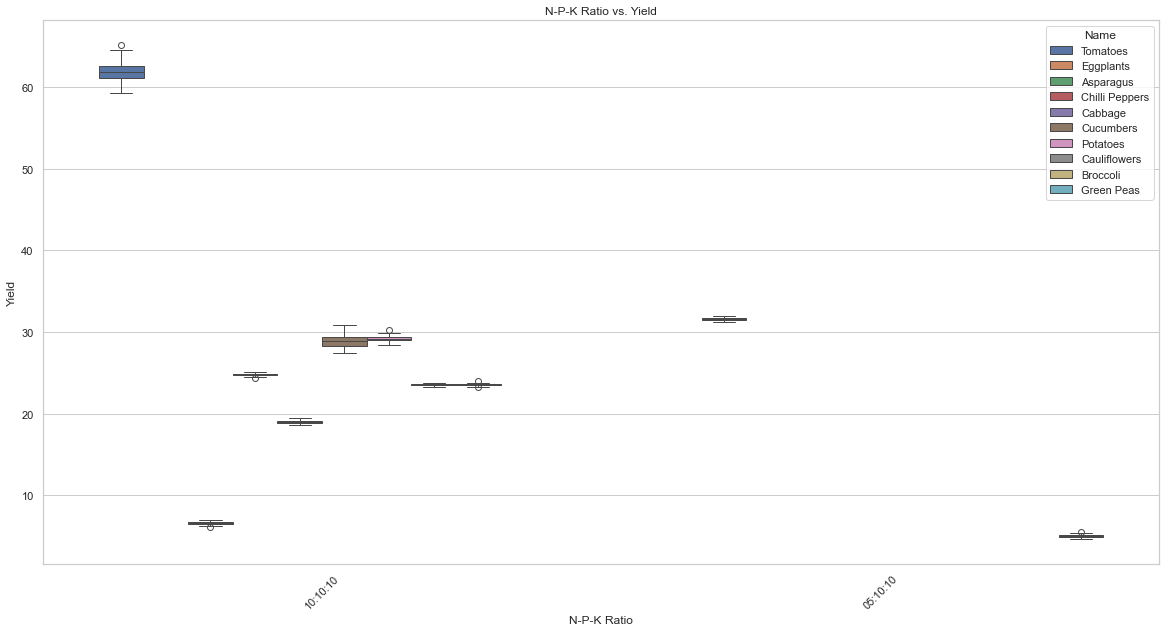

In [50]:
# Create a box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='N-P-K Ratio', y='Yield', hue='Name', data=df)

# Add a title and labels
plt.title('N-P-K Ratio vs. Yield')
plt.xticks(rotation=45)
plt.xlabel('N-P-K Ratio')
plt.ylabel('Yield')

# Show the plot
plt.show()

#### Season vs. Crop Yield for each type of crop
* How does Season affect the crop yield?

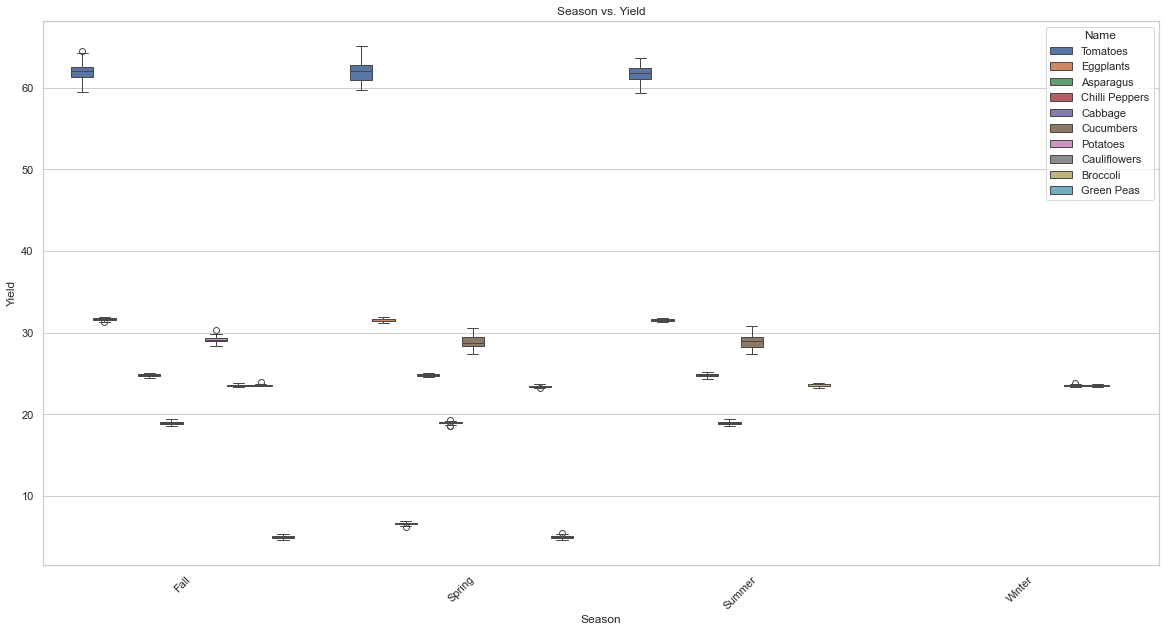

In [51]:
# Create a box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Season', y='Yield', hue='Name', data=df)

# Add a title and labels
plt.title('Season vs. Yield')
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Yield')

# Show the plot
plt.show()

#### For general understanding of rainfall in various seasons

C:\Users\ASHWIT~1\AppData\Local\Temp/ipykernel_28608/1415532567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Rainfall', data=df, palette='viridis')


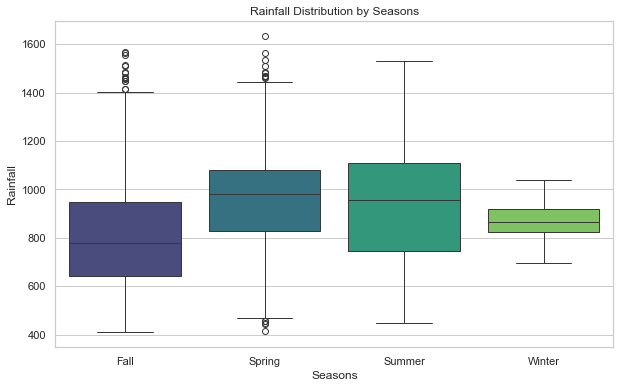

In [22]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Rainfall', data=df, palette='viridis')

# Add a title and labels
plt.title('Rainfall Distribution by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rainfall')

# Show the plot
plt.show()

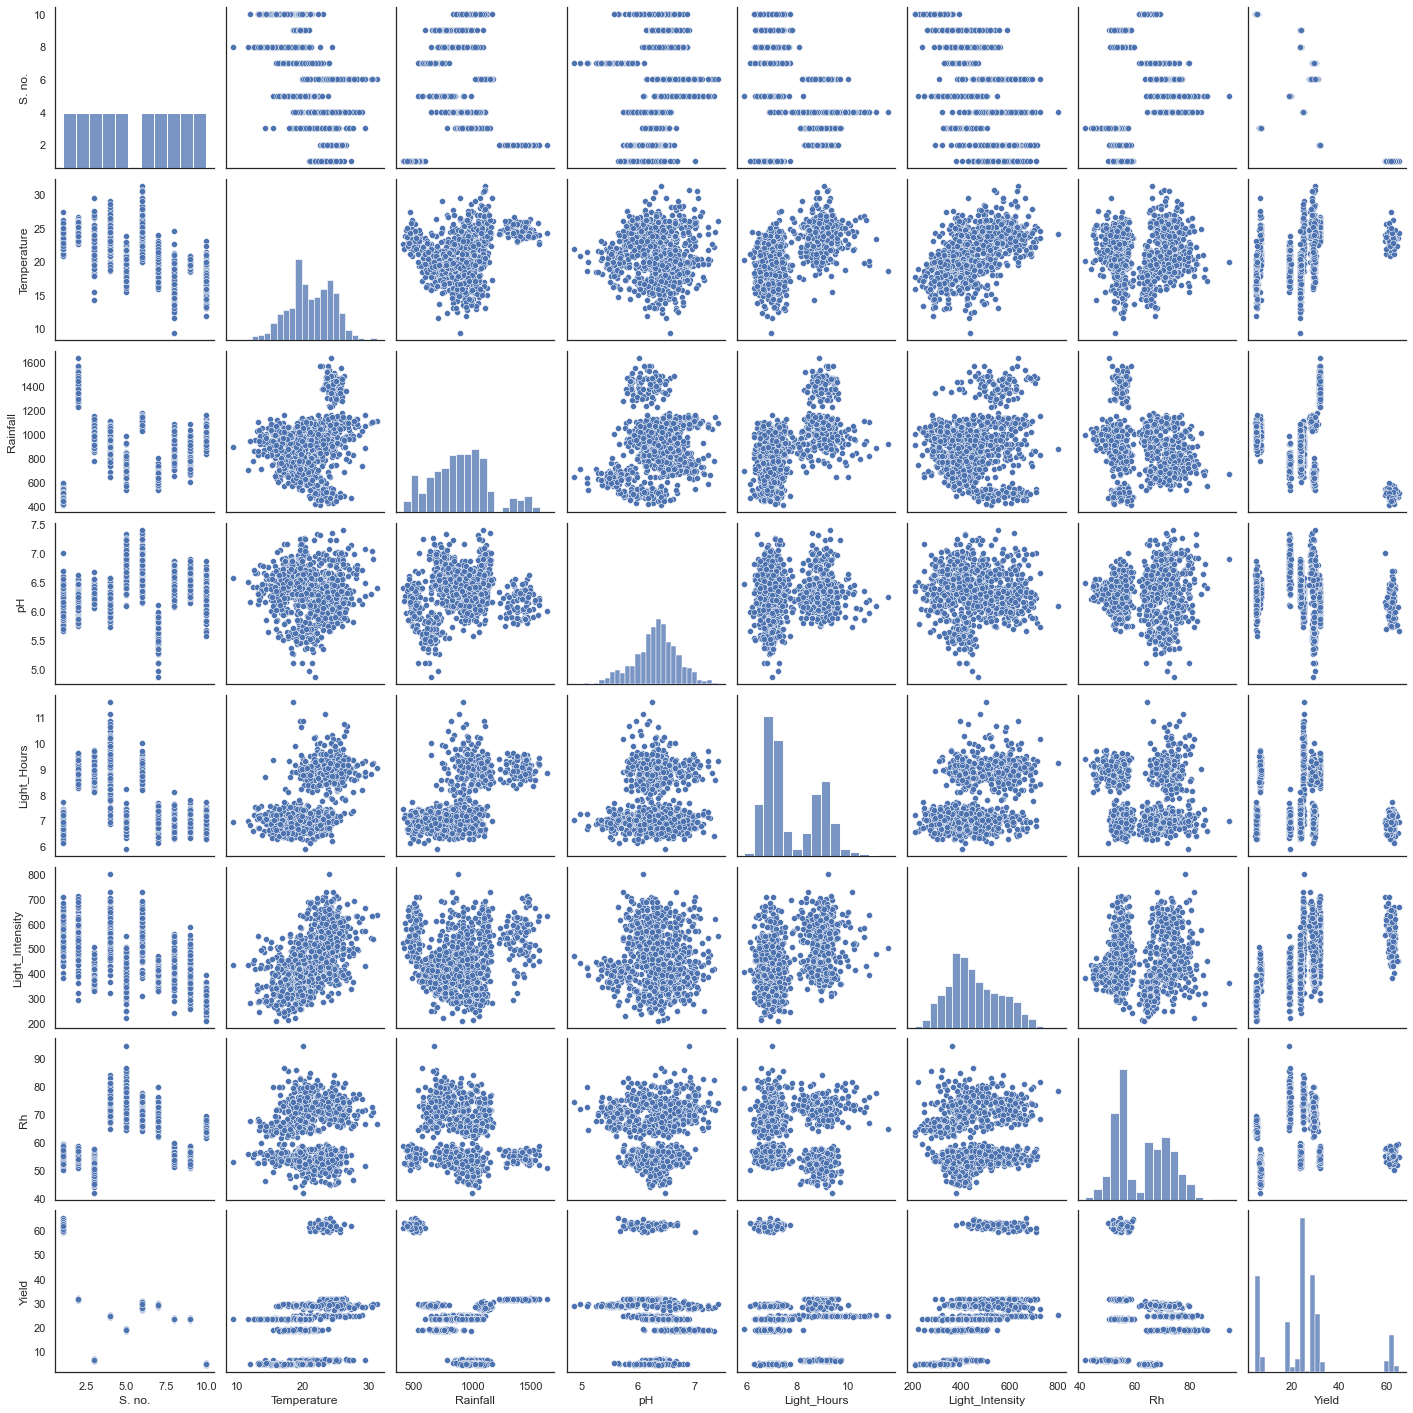

In [17]:
sns.pairplot(df)